# 데이터 재구조화(Reshaping)
> 분석과전에서 원본 데이터 구조가 분석하고자 하는 방향과 맞지 않아 구조를 변경하는 작업을 재구조화라고 한다.

> 재구조화 함수는 다음과 같이 사용된다.
* 데이터 구간화 : 데이터의 구간을 동일한 길이(범위, pd.cut)로 구분하거나 동일한 계수(pc.qcut)로 구분하는 방법
* 윈-핫인코딩 : 구조를 행열 형태로 변환하며 데이터가 존재하는 곳에만 1로 표시하는 방법
* 데이터 전치 : 행과 열을 변경하는 방법
* 피봇 테이블 : 전체 데이터에서 필요한 부분을 분리하여 별도의 테이블을 생성하는 방법
* 열, 행 전환 : 열을 행으로 변환하는 방법
* 행, 열 인덱스 전환 : 행과 열을 교환할 경우 사용하는 방법





##1. 데이터 구간화

###1.1 간단한 사용법 익히기
> 연속된 데이터를 특정 구간으로 나누어 처리하는 방법으로 간단하게 각 함수별 사용법을 알아보자

####1.1.1 파일읽기

In [14]:
import pandas as pd
import numpy as np

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Lec4_BigData/2. 데이터 탐색/Data/exam_sample.csv")
df

,student_no,class,science,english,math,sex
0,1,A,50,98,50,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m
4,5,B,65,80,90,w
5,6,B,98,89,50,m
6,7,B,45,90,80,m
7,8,B,25,78,90,w
8,9,C,15,98,20,w
9,10,C,45,93,50,w


####1.1.2 구간 나누기

In [ ]:
df['math'].describe()

count    10.000000
mean     56.500000
std      23.810595
min      20.000000
25%      46.250000
50%      50.000000
75%      75.000000
max      90.000000
Name: math, dtype: float64

> 결과를 확인해 보면 수학 점수의 최소값은 20이며 최대값은 90인 것을 알 수 있다.

In [ ]:
df_cut_math = pd.cut(df['math'], 3)
df_cut_math

0    (43.333, 66.667]
1    (43.333, 66.667]
2    (43.333, 66.667]
3     (19.93, 43.333]
4      (66.667, 90.0]
5    (43.333, 66.667]
6      (66.667, 90.0]
7      (66.667, 90.0]
8     (19.93, 43.333]
9    (43.333, 66.667]
Name: math, dtype: category
Categories (3, interval[float64]): [(19.93, 43.333] < (43.333, 66.667] < (66.667, 90.0]]

> cut 함수는 데이터를 기준으로 n등분하게 된다. 위의 코드에서 수학점수를 기준으로 3등분하게 되며, 수학점수의 최소값 20에서 최대값 90까지를 3등분하게 된다.

> 실행결과 다음과 같은 구간으로 나뉘게 된다.
* 1구간 : 19.93, 43.333
* 2구간 : 43.333, 66.667
* 3구간 : 66.667, 90.0

####1.1.3 구간별 그룹화

In [ ]:
df_cut_math_group = df['math'].groupby(df_cut_math)
df_cut_math_group.mean()

math
(19.93, 43.333]     25.000000
(43.333, 66.667]    51.000000
(66.667, 90.0]      86.666667
Name: math, dtype: float64

> 위에서 얻은 구간 별로 그룹화 하여 평균을 구해보았다.

In [ ]:
df_cut_math_group.agg({'count', 'mean', 'std', 'min', 'max'})

,mean,max,std,min,count
math,,,,,
"(19.93, 43.333]",25.000000,30,7.071068,20,2
"(43.333, 66.667]",51.000000,60,5.477226,45,5
"(66.667, 90.0]",86.666667,90,5.773503,80,3


> 기본이 되는 집계함수는 문자열 형식으로 처리할 수 있다.

####1.1.4 레이블화

In [ ]:
df_cut_math = pd.cut(df['math'], 3, labels=['C학점', 'B학점', 'A학점'])
df_cut_math

0    B학점
1    B학점
2    B학점
3    C학점
4    A학점
5    B학점
6    A학점
7    A학점
8    C학점
9    B학점
Name: math, dtype: category
Categories (3, object): ['C학점' < 'B학점' < 'A학점']

> 구간을 지정할 ㅒㄸ 위와같이 label을 이용하여 처리가 가능하며 가장 아래 부분에 Categories(3, object):['C학점'<'B학점'<'A학점']형식으로 크기를 알 수 있다.

In [ ]:
df_cut_math_group = df['math'].groupby(df_cut_math)
df_cut_math_group.agg({'count', 'mean', 'std', 'min', 'max'})

,mean,max,std,min,count
math,,,,,
C학점,25.000000,30,7.071068,20,2
B학점,51.000000,60,5.477226,45,5
A학점,86.666667,90,5.773503,80,3


> 그룹화 진행 후 결과를 확인해 보면 가독성이 높게 나타난 것을 볼 수 있다.

####1.1.5 개수 나누기
> 전체 데이터를 n분 하는 것으로 qcut 함수를 이용한다.

In [ ]:
df['english'].describe()

count    10.000000
mean     90.700000
std       7.498889
min      78.000000
25%      86.750000
50%      91.500000
75%      97.750000
max      98.000000
Name: english, dtype: float64

> 최소값 78부터 최대값 98까지 데이터가 분포되어 있다.

In [ ]:
df_qcut_english = pd.qcut(df['english'], 3)
df_qcut_english

0      (97.0, 98.0]
1      (89.0, 97.0]
2    (77.999, 89.0]
3      (97.0, 98.0]
4    (77.999, 89.0]
5    (77.999, 89.0]
6      (89.0, 97.0]
7    (77.999, 89.0]
8      (97.0, 98.0]
9      (89.0, 97.0]
Name: english, dtype: category
Categories (3, interval[float64]): [(77.999, 89.0] < (89.0, 97.0] < (97.0, 98.0]]

> qcut은 범위가 아닌 개수를 n등분하는 함수이다. 실행결과 다음과 같은 값이 나왔다.
* 1구간 : 77.999, 89.0
* 2구간 : 89.0, 97.0
* 3구간 : 97.0, 98.0
위의 분석내용에서 보듯이 범위가 균등하지 않은 것을 알 수 있따.

In [ ]:
df_qcut_english_group = df['english'].groupby(df_qcut_english)
df_qcut_english_group.agg(['count', 'mean', 'std', 'min', 'max'])

,count,mean,std,min,max
english,,,,,
"(77.999, 89.0]",4,83.250000,5.123475,78,89
"(89.0, 97.0]",3,93.333333,3.511885,90,97
"(97.0, 98.0]",3,98.000000,0.000000,98,98


> 위 실행 결과 count가 고르게 분포되어 있는 것을 볼 수 있다.

In [ ]:
df_qcut_english = pd.qcut(df['english'], 3, labels=False)
df_qcut_english

0    2
1    1
2    0
3    2
4    0
5    0
6    1
7    0
8    2
9    1
Name: english, dtype: int64

In [ ]:
df_qcut_english_group = df['english'].groupby(df_qcut_english)
df_qcut_english_group.agg(['count', 'mean', 'std', 'min', 'max'])

> 레이블을 False로 하면 0~ 의 숫자로 카운팅된다.

###1.2 구간화 목적
> 구간화를 이용하면 다음과 같은 문제를 해결할 수 있다.
* 이상치로 발생 가능한 문제를 완화 시켜줄 수 있다.
* 결측치 처리를 보다 간편하게 처리할 수 있다.

In [ ]:
data = [155, 167, 169, 170, 171, 177, 182, 175, 300]
df_student_height = pd.DataFrame(data, columns=['height'])
df_student_height

> 학생들의 키정보를 가지고 있는 data라는 리스트를 만들고 이를 dataframe으로 변환시켰다.

In [3]:
df_student_height.describe()

,height
count,9.000000
mean,185.111111
std,43.730551
min,155.000000
25%,169.000000
50%,171.000000
75%,177.000000
max,300.000000


> 총 데이터는 10개이며 평균은 183정도로 정상적인 수치로 보인다.
하지만 표준편차가 41로 큰 값이 나타나게 되어 이상치가 존재하는 것을 추측할 수 있다. 최소값과 사분위수는 정상적인 범위내에서 고르게 분포되어 있는 것을 볼 수 있으나 최대값이 300으로 이상치가 존재하는 것을 알 수 있다.

In [6]:
df_student_height_cut = pd.cut(df_student_height['height'], [150, 160, 170, 180, 190, 230])
df_student_height_cut

0    (150.0, 160.0]
1    (160.0, 170.0]
2    (160.0, 170.0]
3    (160.0, 170.0]
4    (170.0, 180.0]
5    (170.0, 180.0]
6    (180.0, 190.0]
7    (170.0, 180.0]
8               NaN
Name: height, dtype: category
Categories (5, interval[int64]): [(150, 160] < (160, 170] < (170, 180] < (180, 190] < (190, 230]]

> cut 함수에서 범위를 직접 지정하여 사용할 수 있으며 정상 범위가 아닌 데이터는 결측치로 나타나게 된다. 이러한 방법으로 이상치를 완화시킬 수 있다.

In [7]:
df_student_height_group = df_student_height.groupby(df_student_height_cut)
df_student_height_group.agg(['count', 'mean', 'std', 'min', 'max'])

height                                    
            count        mean       std    min    max
height                                               
(150, 160]      1  155.000000       NaN  155.0  155.0
(160, 170]      3  168.666667  1.527525  167.0  170.0
(170, 180]      3  174.333333  3.055050  171.0  177.0
(180, 190]      1  182.000000       NaN  182.0  182.0
(190, 230]      0         NaN       NaN    NaN    NaN

####1.2.2 결측치 처리

In [ ]:
data = [155, 167, 169, 170, 171, 177, 182, np.nan, 300]
df_student_height = pd.DataFrame(data, columns=['height'])
df_student_height

> np.nan을 이용하여 중간에 결측치를 추가했다.

In [ ]:
df_student_height_cut = pd.cut(df_student_height['height'], [150, 160, 170, 180, 190])
df_student_height_cut

In [12]:
df_student_height_group = df_student_height.groupby(df_student_height_cut)
df_student_height_group.agg(['count', 'mean', 'std', 'min', 'max'])

height                                    
            count        mean       std    min    max
height                                               
(150, 160]      1  155.000000       NaN  155.0  155.0
(160, 170]      3  168.666667  1.527525  167.0  170.0
(170, 180]      2  174.000000  4.242641  171.0  177.0
(180, 190]      1  182.000000       NaN  182.0  182.0

> 이상치를 완화시키고, 결측치를 제외한 데이터들의 정보를 얻을 수 있다.

> 이상치 발생 시 정상적이지 않은 평균을 얻게 되어 대표값으로 쓸수 없게된다. 위와 같이 처리하면 이를 해결할 수 있다.

##2. 원-핫 인코딩
> 원-핫 인코딩은 사람이 이해하는 언어를 컴퓨터가 쉽게 이해할 수 있도록 표현하고 단어가 존재하는 곳은 1로 아닌 곳은 0 으로 표현하는 방법이다. 주로 단어 처리를 위해 사용되는 기술로 추후 추천 알고리즘이나 자연어 처리 부분에서 활용할 수 있게 된다.

> iris 데이터셋에서 품종은 총 3가지 이다. 원핫인코딩으로 표현하면 모든 품종을 feature에 넣고 각 행별로 존재하는 값이 있는 부분에 1로 값을 채워넣는 방법이 원핫인코딩이다.

In [16]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Lec4_BigData/2. 데이터 탐색/Data/exam_sample.csv")
pd.get_dummies(df)

,student_no,science,english,math,class_A,class_B,class_C,sex_m,sex_w
0,1,50,98,50,1,0,0,1,0
1,2,60,97,60,1,0,0,0,1
2,3,78,86,45,1,0,0,0,1
3,4,58,98,30,1,0,0,1,0
4,5,65,80,90,0,1,0,0,1
5,6,98,89,50,0,1,0,1,0
6,7,45,90,80,0,1,0,1,0
7,8,25,78,90,0,1,0,0,1
8,9,15,98,20,0,0,1,0,1
9,10,45,93,50,0,0,1,0,1


> get_dummies 함수는 type이 object인 데이터를 원-핫인코딩으로 표현한다.


# 시계열 데이터

##1. 이해하기

> 시계열 데이터는 시간의 흐름에 따른 데이터의 변화를 분석 및 예측하는데 사용되는 데이터 이다.
* 타임스탬프(Timestamp) - 특정 시점을 의미하는 자료형
* 기간(period) - 일정 시간을 의미하는 자료형

##2. 시간 조작

In [19]:
import pandas as pd

dates=['2021-01-01', '2021-03-01', '2021-05-01']
print(dates)

['2021-01-01', '2021-03-01', '2021-05-01']


> 간단하게 문자열 날짜 데이터를 만들었다.

In [21]:
timestamp_dates = pd.to_datetime(dates)
print(type(timestamp_dates))
timestamp_dates

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


DatetimeIndex(['2021-01-01', '2021-03-01', '2021-05-01'], dtype='datetime64[ns]', freq=None)

> 문자열 날짜를 to_datetime함수를 이용하여 datetime64 형식의 timestamp로 변환

> to_datetime 함수를 이용해 얻는 데이터의 자료형은 DatetimeIndex이며 내부 데이터의 자료형은 datatime64임을 알 수 있다.

###2.2 period간단하게 사용하기

In [22]:
period_day = timestamp_dates.to_period(freq='D')
period_month = timestamp_dates.to_period(freq='M')
period_year = timestamp_dates.to_period(freq='Y')

print('day : ', period_day)
print('month : ', period_month)
print('year : ', period_year)

day :  PeriodIndex(['2021-01-01', '2021-03-01', '2021-05-01'], dtype='period[D]', freq='D')
month :  PeriodIndex(['2021-01', '2021-03', '2021-05'], dtype='period[M]', freq='M')
year :  PeriodIndex(['2021', '2021', '2021'], dtype='period[A-DEC]', freq='A-DEC')


> to_period는 전체 날짜에서 특정 데이터만 변환하는 것으로 freq에 따라 다음과 같이 나타난다.
* D: day까지 표현
* M: month까지 표현
* y: year만 표현

##3. 활용하기

###3.1 파일 읽기

In [23]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


>구글드라이브에서 timeseries.csv파일 읽어오기

In [24]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Lec4_BigData/2. 데이터 탐색/Data/timeseries.csv")
df

,Date,Close,Start,High,Low,Volume
0,2015-07-02,10100,10850,10900,10000,137977
1,2016-06-29,10700,10550,10900,9990,170253
2,2017-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2019-06-26,10800,10900,11000,10700,63039


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5 non-null      object
 1   Close   5 non-null      int64 
 2   Start   5 non-null      int64 
 3   High    5 non-null      int64 
 4   Low     5 non-null      int64 
 5   Volume  5 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 368.0+ bytes


> 실행결과 date가 object형 임을 알 수 있다. 이를 사계열 데이터로 변환하여 시간의 연산을 처리할 수 있다.

In [29]:
df['new_Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5 non-null      object        
 1   Close     5 non-null      int64         
 2   Start     5 non-null      int64         
 3   High      5 non-null      int64         
 4   Low       5 non-null      int64         
 5   Volume    5 non-null      int64         
 6   new_Date  5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 408.0+ bytes


> new_Date라는 feature를 만들어 기존의 Date를 datetime으로 변환하여 저장한다. info를 확인해 보면 datetime64형으로 추가된 것을 확인할 수 있다.

In [31]:
df_drop = df
df_drop.drop('Date', axis=1, inplace=True)

In [32]:
df_drop

,Close,Start,High,Low,Volume,new_Date
0,10100,10850,10900,10000,137977,2015-07-02
1,10700,10550,10900,9990,170253,2016-06-29
2,10400,10900,10950,10150,155769,2017-06-28
3,10900,10800,11050,10500,133548,2018-06-27
4,10800,10900,11000,10700,63039,2019-06-26


> Date는 문자열이고 이를 날짜 함수로 변환한 new_Date가 존재하여 기존 Date를 삭제하려고 한다. drop함수를 이용하여 feature가 'Date'인 열(axis=1)을 제거하는데 inplace=True이면 처리된 결과를 원본 데이터 즉, df_drop에 적용하게 된다.

In [35]:
df_drop = df_drop.set_index(['new_Date'])
df_drop

,Close,Start,High,Low,Volume
new_Date,,,,,
2015-07-02,10100,10850,10900,10000,137977
2016-06-29,10700,10550,10900,9990,170253
2017-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2019-06-26,10800,10900,11000,10700,63039


> index정보를 기존의 feature로 설정할 경우 set_index를 사용하게 된다. 위엥서 처럼 new_Date를 이용하여 새로운 index를 설정하였다. 이를 이용하여 시간의 흐름에 따른 데이터들의 변화를 차트화 할 것이다.

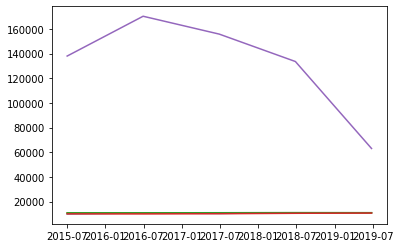

In [36]:
import matplotlib.pyplot as plt

plt.plot(df_drop)

> 위와 같이 선 그래프를 이용하여 날짜에 따른 데이터의 변화량을 볼 수 있다.

###3.3 period


In [37]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Lec4_BigData/2. 데이터 탐색/Data/timeseries.csv")
df

,Date,Close,Start,High,Low,Volume
0,2015-07-02,10100,10850,10900,10000,137977
1,2016-06-29,10700,10550,10900,9990,170253
2,2017-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2019-06-26,10800,10900,11000,10700,63039


> 데이터가 변경되어 다시 읽어 들인다.

In [39]:
df['new_Date'] = pd.to_datetime(df['Date'])
df

,Date,Close,Start,High,Low,Volume,new_Date
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26


In [40]:
df['year'] = df['new_Date'].dt.year
df['month'] = df['new_Date'].dt.month
df['day'] = df['new_Date'].dt.day

df

,Date,Close,Start,High,Low,Volume,new_Date,year,month,day
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26


> date['new_Date']의 자료형은 datetime64이다. 이 자료형에서는 dt라는 객체를 지원해주며 dt내부의 year, month, day를 이용하여 년, 월, 일 정보를 얻을 수 잇다.

자세한 사이트는
[https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html)참조

In [41]:
df.set_index('new_Date', inplace=True)
df

,Date,Close,Start,High,Low,Volume,year,month,day
new_Date,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016,6,29
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017,6,28
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,27
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019,6,26


> new_Date를 index로 변환한다.}

In [45]:
print(df.loc['2015'])
print()
print(df.loc['2015-07'])
print()
print(df.loc['2015-07-02'])

                  Date  Close  Start   High    Low  Volume  year  month  day
new_Date                                                                    
2015-07-02  2015-07-02  10100  10850  10900  10000  137977  2015      7    2

                  Date  Close  Start   High    Low  Volume  year  month  day
new_Date                                                                    
2015-07-02  2015-07-02  10100  10850  10900  10000  137977  2015      7    2

Date      2015-07-02
Close          10100
Start          10850
High           10900
Low            10000
Volume        137977
year            2015
month              7
day                2
Name: 2015-07-02 00:00:00, dtype: object


> loc를 이용하면 index정보를 읽어 들일 수 있으며 년도별, 월별, 일별 데이터를 추출할 수 있다.

In [46]:
df['2015-06-25' : '2018-06-24']

,Date,Close,Start,High,Low,Volume,year,month,day
new_Date,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016,6,29
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017,6,28


> 날자 범위를 지정하여 데이터를 추출할 수 있다.

In [47]:
today = pd.to_datetime('2021-06-23')
df['time-diff'] = today - df.index
df

,Date,Close,Start,High,Low,Volume,year,month,day,time-diff
new_Date,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2,2183 days
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016,6,29,1820 days
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017,6,28,1456 days
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,1092 days
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019,6,26,728 days


> 오늘 날짜를 계상하여 몇일이 지났는지를 확인할 수 있다.